In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("stock_prices.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
1,2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2,2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
3,2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
4,2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


In [3]:
# Step 2: Explore the Dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       632 non-null    object 
 1   Open       632 non-null    float64
 2   High       632 non-null    float64
 3   Low        632 non-null    float64
 4   Close      632 non-null    float64
 5   Adj Close  632 non-null    float64
 6   Volume     632 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.7+ KB
None


In [4]:
print(data.describe())

             Open        High         Low       Close   Adj Close  \
count  632.000000  632.000000  632.000000  632.000000  632.000000   
mean   108.337674  109.602440  107.137917  108.382393  108.382393   
std     27.507147   27.593982   27.290470   27.418889   27.418889   
min     52.825500   53.566002   50.676800   52.831001   52.831001   
25%     81.543747   82.662062   80.789373   81.714624   81.714624   
50%    113.152752  114.783001  112.029625  113.216503  113.216503   
75%    133.636879  135.621746  132.479744  133.902122  133.902122   
max    151.863495  152.100006  149.887497  150.709000  150.709000   

             Volume  
count  6.320000e+02  
mean   3.051286e+07  
std    1.326435e+07  
min    6.936000e+06  
25%    2.179800e+07  
50%    2.754000e+07  
75%    3.492650e+07  
max    8.975000e+07  


In [5]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Step 3: Ensure the Date Column is in Datetime Format

data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index (optional, but useful for time series analysis)
data.set_index('Date', inplace=True)

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632 entries, 2020-03-11 to 2022-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       632 non-null    float64
 1   High       632 non-null    float64
 2   Low        632 non-null    float64
 3   Close      632 non-null    float64
 4   Adj Close  632 non-null    float64
 5   Volume     632 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 34.6 KB
None


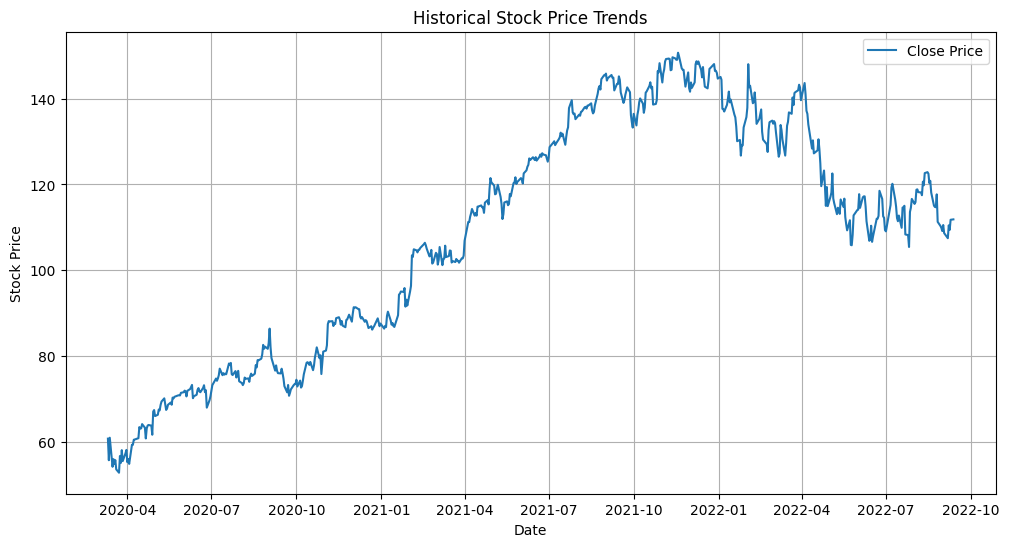

In [7]:
# Step 4: Plot Historical Stock Price Trends

import matplotlib.pyplot as plt

# Plotting the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')  # Assuming 'Close' is the column for closing prices
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

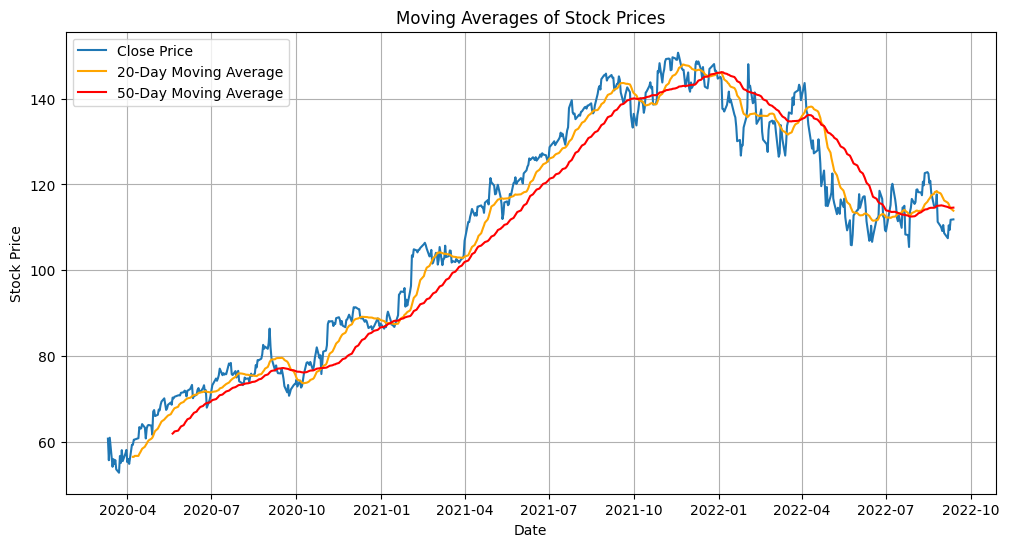

In [8]:
# Step 5: Calculate and Plot Moving Averages

# Calculate moving averages (e.g., 20-day and 50-day moving averages)
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()

# Plotting the moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['20_MA'], label='20-Day Moving Average', color='orange')
plt.plot(data['50_MA'], label='50-Day Moving Average', color='red')
plt.title('Moving Averages of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x800 with 0 Axes>

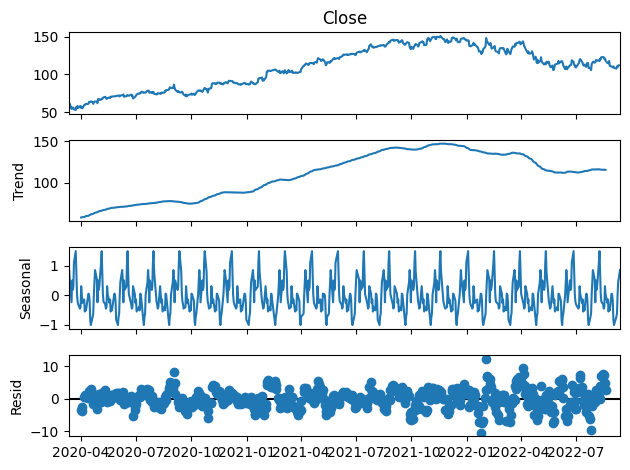

In [11]:
# Step 6: Perform Seasonality Analysis

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)  # Monthly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


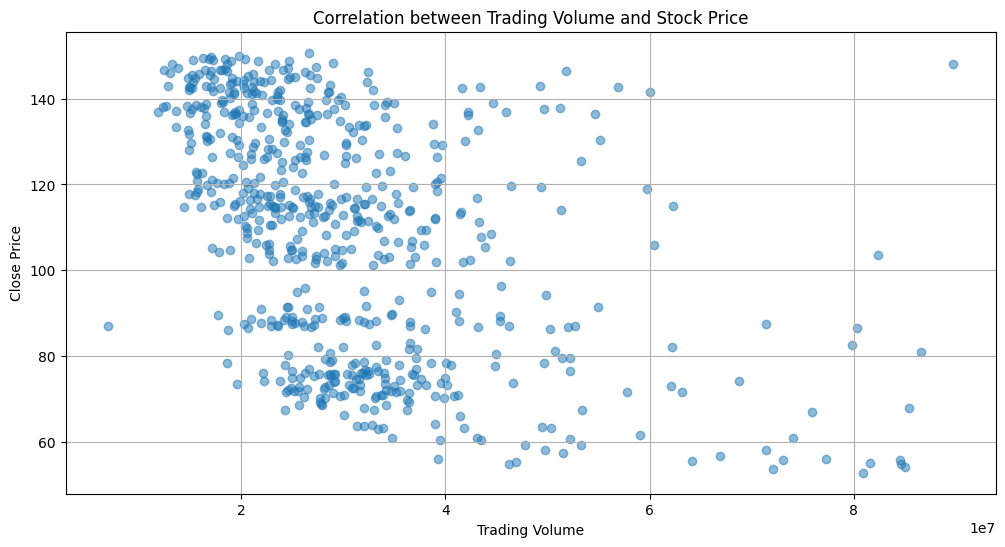

Correlation between Close Price and Volume: -0.4775281231717824


In [12]:
# Step 7: Analyze and Plot Correlation

# Assuming 'Volume' is another column in your dataset
plt.figure(figsize=(12, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Correlation between Trading Volume and Stock Price')
plt.xlabel('Trading Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# Calculate and display correlation coefficient
correlation = data['Close'].corr(data['Volume'])
print(f'Correlation between Close Price and Volume: {correlation}')


c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  632
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1360.975
Date:                Mon, 30 Sep 2024   AIC                           2733.951
Time:                        15:24:31   BIC                           2760.635
Sample:                             0   HQIC                          2744.315
                                - 632                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0802      0.035     -2.276      0.023      -0.149      -0.011
ar.L2          0.0401      0.036      1.125      0.261      -0.030       0.110
ar.L3         -0.1011      0.032     -3.151      0.0

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


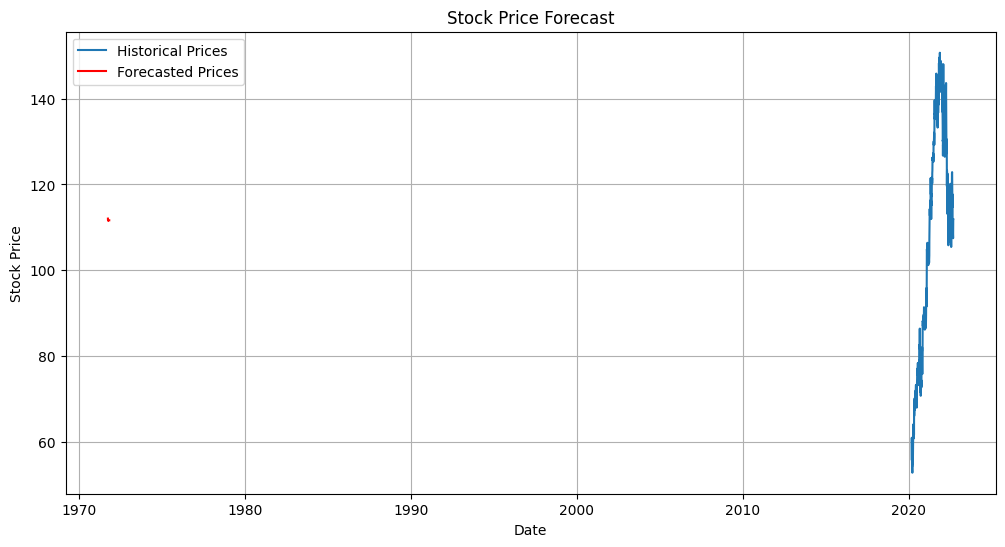

In [13]:
# Step 8: Forecast Future Stock Prices

from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (choose appropriate parameters p, d, q)
model = ARIMA(data['Close'], order=(5, 1, 0))  # Adjust parameters as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecasting future stock prices
forecast = model_fit.forecast(steps=30)  # Forecasting for the next 30 days

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()
